#  Pyber - Bonanza ride sharing, Business Analysis


The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, we've decided to join a fledgling ride sharing company of your own. In your latest capacity, you're filling a role as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.
 
 
You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.
 
Analysis should includes:
 
 - Average Fare ($) Per City 
 - Total Number of Rides Per City
 - Total Number of Drivers Per City
 - City Type (Urban, Suburban, Rural)

- % of Total Fares by City Type
- % of Total Rides by City Type
- % of Total Drivers by City Type



In [28]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path_city_data = "Resources/Pyber_city_data.csv"
path_ride_data = "Resources/Pyber_ride_data.csv"

city_data = pd.read_csv(path_city_data)
ride_data = pd.read_csv(path_ride_data)

city_data.head()
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


#  Analysis

In [29]:
#MERGING THE "CITY" AND "RIDE" DATA IN ONE BY CITY 
merged_data = pd.merge(city_data, ride_data, how="left", on="city")


#GROUPED THE DATA TO SHOW THE COLUMNS NECESSARY IN THE DATA FRAME
#--->
grouped_data = merged_data.groupby(["city","driver_count", "type"])


#CHECKING IF THE DATA IS HOMEGENEUS
# grouped_data.count()


#CALCULATING THE AVERAGE FARE AND COUNTING HOW MANY RIDES
#--->
average_fare = grouped_data["fare"].mean()
total_rideid = grouped_data["ride_id"].count()


#RUN THE ANALYSIS IN A DATA FRAME
Analysis_0 = pd.DataFrame({ "Average Fare" : average_fare,
                           "Total rides" : total_rideid,
                           
                          })


#FORMATING THE AVERAGE FARE AND SORTING THE DATA FRAME BY NUMBER OF RIDES
#--->
Analysis_0["Average Fare"] = Analysis_0["Average Fare"].map("$ {:.2f}".format)
Analysis_0 = Analysis_0.sort_values(["Total rides"], ascending=False ).head()

Analysis_0


,,,Average Fare,Total rides
city,driver_count,type,,
West Angela,48,Urban,$ 25.99,39
South Karenland,4,Urban,$ 26.54,38
North Jason,6,Urban,$ 22.74,35
Liumouth,69,Urban,$ 26.15,33
Port Frank,23,Urban,$ 27.20,33


#  Bubble Chart

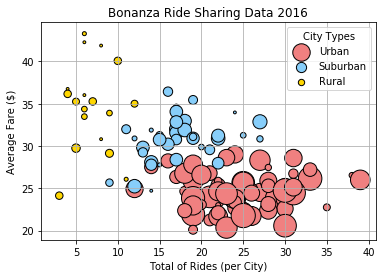

In [30]:

#URBAN PLOT
#Grabbing all the values in the "type columns that is equal of "URBAN 
#and groupping by city because it will be plotted by cities

Urban_type = merged_data[merged_data["type"] == "Urban"].groupby([merged_data["city"]])

Urban_ride = Urban_type["ride_id"].count()
Urban_fare = Urban_type["fare"].mean()
Urban_size = Urban_type["driver_count"].mean()


Urban_plot = plt.scatter( Urban_ride , Urban_fare,label="Urban", marker="o", 
                         facecolors="Lightcoral", edgecolors= "black", 
                         s= Urban_size*8, alpha=1
                           )



#SUBURBAN PLOT
#Grabbing all the values in the "type columns that is equal of "Suburban 
#and groupping by city because it will be plotted by cities

Suburban_type = merged_data[merged_data["type"] == "Suburban"].groupby([merged_data["city"]])

Suburban_ride = Suburban_type["ride_id"].count()
Suburban_fare = Suburban_type["fare"].mean()
Suburban_size = Suburban_type["driver_count"].mean()


Suburban_plot = plt.scatter( Suburban_ride, Suburban_fare ,label="Suburban", marker="o", 
                            facecolors="Lightskyblue", edgecolors= "black",
                            s= Suburban_size*8, alpha=1
                               )



#RURAL PLOT
#Grabbing all the values in the "type columns that is equal of "Rural 
#and groupping by city because it will be plotted by cities

Rural_type = merged_data[merged_data["type"] == "Rural"].groupby([merged_data["city"]])

Rural_ride = Rural_type["ride_id"].count()
Rural_fare = Rural_type["fare"].mean()
Rural_size = Rural_type["driver_count"].mean()


Rural_plot = plt.scatter( Rural_ride, Rural_fare ,label='Rural', marker="o", 
                         facecolors="Gold", edgecolors= "black", 
                         s= Rural_size*8, alpha=1
                           )


#plt.xlim(-1, 50)
#plt.ylim(-1, 50)
plt.grid(1)

plt.xlabel("Total of Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.legend(title= "City Types", loc="best")
plt.title("Bonanza Ride Sharing Data 2016")
plt.show()


#  Pie Chart, by Fare

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


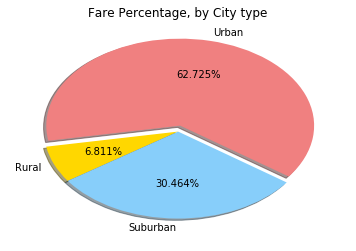

In [31]:
#GROUPED BY TYPE 
grouped_by_type = merged_data.groupby("type")


#GET THE TOTAL OF FARE
fare_count = grouped_by_type["fare"].sum().sum()


#CALCULATE THE PERCENTAGE BY TYPE
#--->

#1- try
fare_percentage = (grouped_by_type["fare"].sum()*100)/ fare_count
print(fare_percentage)
#3- try

fare_df= pd.DataFrame({ "title" : fare_percentage
    
})

#CREATING THE PIE CHART

labels = ["Rural","Suburban", "Urban"]
colors = ["Gold", "LightskyBlue", "LightCoral"]
explode = (0, 0, 0.07)

plt.xlim(-0.75,  62.724635- 0.25)
plt.ylim(0,  62.724635+ 5)
plt.title("Fare Percentage, by City type")

plt.pie(fare_df, labels=labels, colors=colors, 
        autopct="%2.3f%%", explode=explode, shadow=True, startangle=190)

plt.savefig("Images/Pie_FarebyCityType.png")

plt.show()


#  Pie Chart, by Rides


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


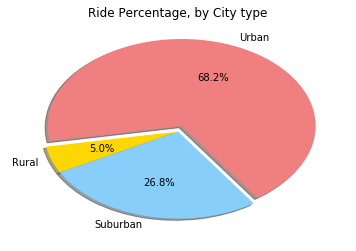

In [32]:
#GET THE TOTAL OF RIDES
ride_count = grouped_by_type["ride_id"].sum().sum()
#CALCULATE THE PERCENTAGE BY TYPE
#--->

#1- try
ride_percentage = (grouped_by_type["ride_id"].sum()*100)/ ride_count
print(fare_percentage)
#3- try

ride_df= pd.DataFrame({ "title" : ride_percentage
    
})

#CREATING THE PIE CHART

labels = ["Rural","Suburban", "Urban"]
colors = ["Gold", "LightskyBlue", "LightCoral"]
explode = (0, 0, 0.07)

plt.xlim(-0.75,  62.724635- 0.25)
plt.ylim(0,  62.724635+ 5)
plt.title("Ride Percentage, by City type")

plt.pie(ride_df, labels=labels, colors=colors, 
        autopct="%2.1f%%", explode=explode, shadow=True, startangle=190)

plt.savefig("Images/Pie_Ride_byCityType.png")

plt.show()

#  Pie Chart, by Drivers

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64


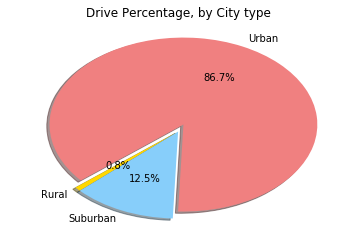

In [33]:
#GET THE TOTAL OF RIDES
drivers_count = grouped_by_type["driver_count"].sum().sum()

#CALCULATE THE PERCENTAGE BY TYPE
#--->
drivers_percentage = (grouped_by_type["driver_count"].sum()*100)/ drivers_count
print(drivers_percentage)


#PLACING THE RESUNTS IN A DATA FRAME

drivers_df= pd.DataFrame({ "title" : drivers_percentage
    
})

#CREATING THE PIE CHART

labels = ["Rural","Suburban", "Urban"]
colors = ["Gold", "LightskyBlue", "LightCoral"]
explode = (0, 0, 0.09)

plt.xlim(-0.75,  62.724635- 0.25)
plt.ylim(0,  62.724635+ 5)
plt.title("Drive Percentage, by City type")

plt.pie(drivers_df, labels=labels, colors=colors, 
        autopct="%2.1f%%", explode=explode, shadow=True, startangle=220)

plt.savefig("Images/Pie_Drice_byCityType.png")

plt.show()